### Statistics for DATA SCIENCE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from matplotlib.pyplot import figure

## Bernoulli Distribution

This distribution has only two possible outcomes and a single trial. 
A simple example can be a single toss of a biased/unbiased coin. In this example, the probability that the outcome might be heads can be considered equal to p and (1 - p) for tails (the probabilities of mutually exclusive events that encompass all possible outcomes needs to sum up to one).

In [405]:
# size = number of experiments
# p = probability of success
bern = stats.bernoulli.rvs(size=10000,p=0.5)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

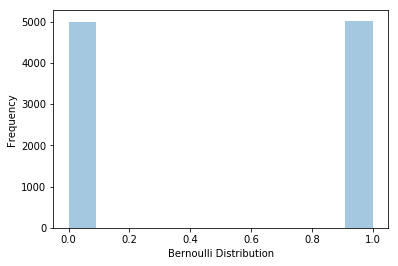

In [132]:
ax= sns.distplot(bern,
                 kde=False)
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

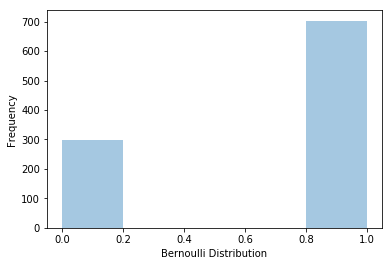

In [245]:
biased_bern = stats.bernoulli.rvs(size=1000,p=0.7)
ax= sns.distplot(biased_bern,
                 kde=False)
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

(0, 1)

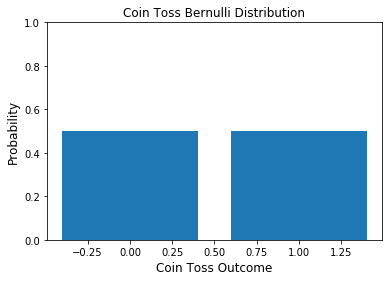

In [377]:
probs = np.full((2), 1/2)
face = [0,1]
plt.bar(face, probs)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Coin Toss Outcome', fontsize=12)
plt.title('Coin Toss Bernulli Distribution', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

(0, 1)

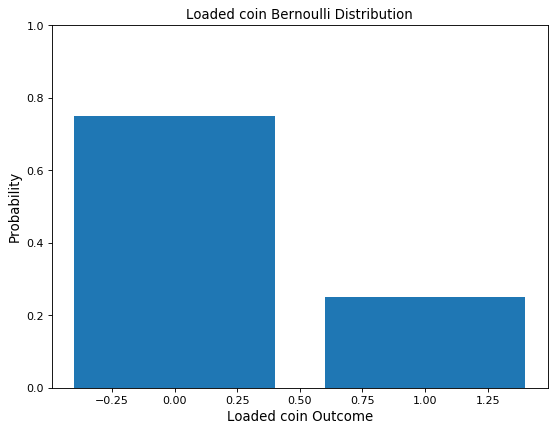

In [2]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
probs = np.array([0.75, 0.25])
face = [0, 1]
plt.bar(face, probs)
plt.title('Loaded coin Bernoulli Distribution', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Loaded coin Outcome', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

## Uniform (Gaussian) Distribution

The Uniform Distribution can be easily derived from the Bernoulli Distribution. In this case, a possibly unlimited number of outcomes are allowed and all the events hold the same probability to take place. As an example, imagine the roll of a fair dice. In this case, there are multiple possible events which each of them having the same probability to happen.

In [404]:
# size = number of experiments
# loc = starting point
# scale = end point
uniform = stats.uniform.rvs(size=10000,loc =0, scale=6)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution')]

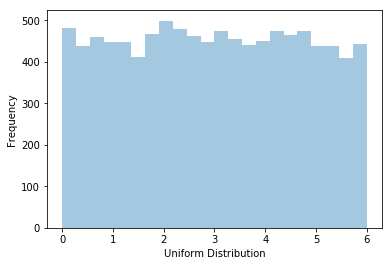

In [402]:
ax = sns.distplot(uniform,
                  kde=False)
ax.set(xlabel='Uniform Distribution', ylabel='Frequency')

1.0


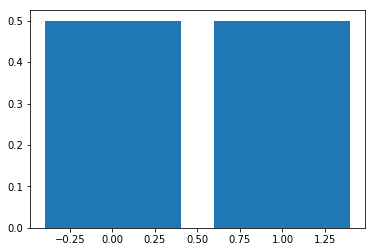

In [205]:
x = [0,1]
counts, bins = np.histogram(x, bins= 100)
bins = bins[:-1] + (bins[1] - bins[0])/2
probs = counts/float(counts.sum())
print(probs.sum()) # 1.0
plt.bar(bins, probs)
plt.show()

1.0


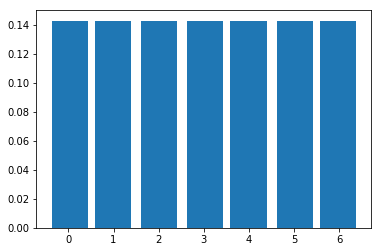

In [204]:
x = [0,1,2,3,4,5,6]
counts, bins = np.histogram(x, bins= 100)
bins = bins[:-1] + (bins[1] - bins[0])/2
probs = counts/float(counts.sum())
print(probs.sum()) # 1.0
plt.bar(bins, probs)
plt.show()

(0, 1)

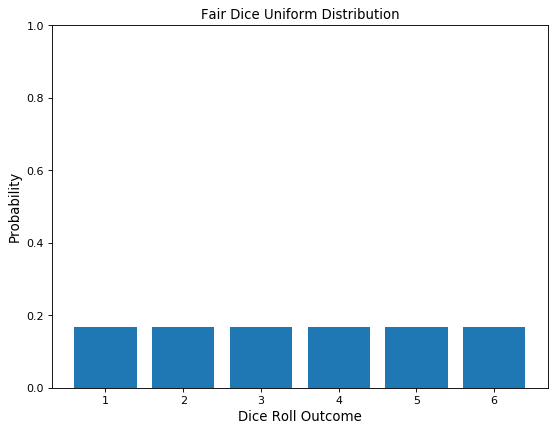

In [3]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
probs = np.full((6), 1/6)
face = [1,2,3,4,5,6]
plt.bar(face, probs)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Dice Roll Outcome', fontsize=12)
plt.title('Fair Dice Uniform Distribution', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

(0, 1)

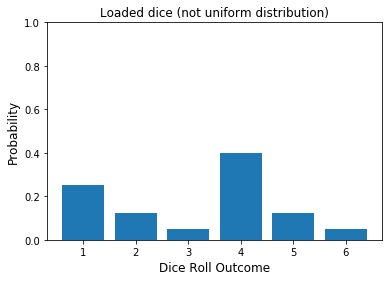

In [398]:
probs = np.array([0.25, 0.125, 0.05, 0.4, 0.125, 0.05])
face = [1,2,3,4,5,6]
plt.bar(face, probs)
plt.title('Loaded dice (not uniform distribution)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Dice Roll Outcome', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

## Binomial Distribution

The Binomial Distribution can instead be thought as the sum of outcomes of an event following a Bernoulli distribution. The Binomial Distribution is therefore used in binary outcome events and the probability of success and failure is the same in all the successive trials. This distribution takes two parameters as inputs: the number of times on event takes place and the probability assigned to one of the two classes.
A simple example of a Binomial Distribution in action can be the toss of a biased/unbiased coin repeated a certain amount of times.

The main characteristics of a Binomial Distribution are:
- Given multiple trials, each of them is independent of each other (the outcome  of one trial doesn't affect another one).
- Each trial can lead to just two possible results (eg. winning or losing), which have probabilities p and (1 - p).

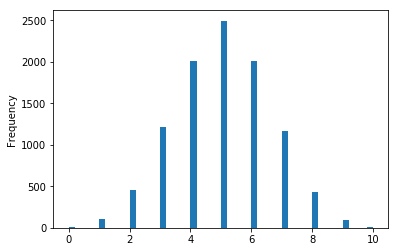

In [2]:
# size = number of experiments
# n = number of trials (number of trials for each experiment)
# p = probability that one of the two events is going to take place
binomial_data = stats.binom.rvs(size=10000, n=10, p=0.5, random_state=0)
pd.Series(binomial_data).plot(kind="hist", bins = 50)

Changing the probability value changes how the distribution looks like.

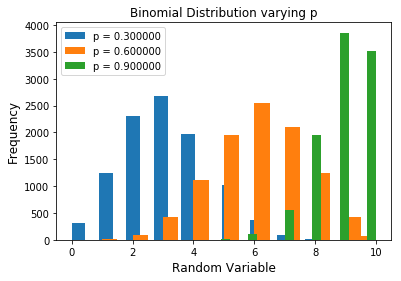

In [10]:
for prob in range(3, 10, 3):
    binomial_data = stats.binom.rvs(size=10000, n=10, p=0.1*prob, 
                                    random_state=0)
    pd.Series(binomial_data).plot(kind="hist", bins = 20, 
                              label="p = {:f}".format(0.1*prob))
    plt.xlabel('Random Variable', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title("Binomial Distribution varying p")
    plt.legend()

### Cumulative distribution function

Cumulative Distribution Function (CDF) = gives us the probability of a certain random observation will have a lower value than the one provided by the user.

In [4]:
stats.binom.cdf(k=7,        # Probability of k = 7 heads or less
                n=10,       # In 10 trials
                p=0.8)      # And success probability 0.8

0.3222004736

In [5]:
# adding the minus one at the beginning, we get the probability of the event
# not happening
1 - stats.binom.cdf(k=6,        # Probability of k = 6 heads or less
                    n=10,       # In 10 trials
                    p=0.8)      # And success probability 0.8

0.8791261184000001

### Probability mass function

Probability density function (PDF) = gives us the likelihood of a random variable assuming a certain value.

In [6]:
stats.binom.pmf(k=5,        # Probability of k = 5 heads
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.5

0.02642411520000004

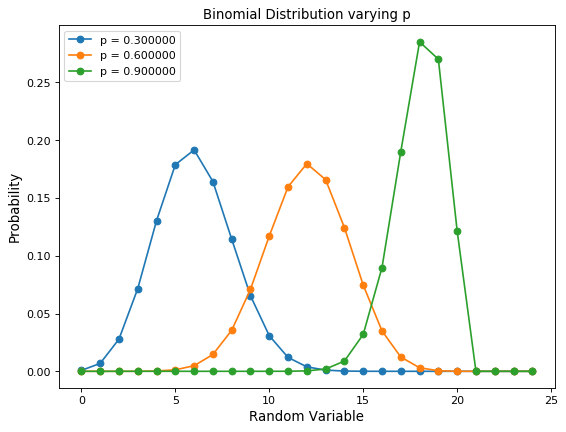

In [6]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# pmf(random_variable, number_of_trials, probability)
for prob in range(3, 10, 3):
    x = np.arange(0, 25)
    binom = stats.binom.pmf(x, 20, 0.1*prob)
    plt.plot(x, binom, '-o', label="p = {:f}".format(0.1*prob))
    plt.xlabel('Random Variable', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title("Binomial Distribution varying p")
    plt.legend()

## Normal Distribution

Some of the characteristics which can help us to recognise a normal distribution are: <br>
- The curve is symmetric at the centre. Therefore mean, mode and median are all equal to the same value, making distribute all the values symmetrically around the mean.
- The area under the distribution curve is equal to 1 (all the probabilities must sum up to 1). 

When using Normal Distributions, the distribution mean and standard deviation plays a really important role. If we know their values, we can then easily find out the probability of predicting exact values by just examining the probability distribution. In fact, thanks to the distribution properties, 68% of the data lies within one standard deviation of the mean, 95% within two standard deviations of the mean and 99.7% within three standard deviations of the mean.

Many Machine Learning models are designed to work best-using data that follow a Normal Distribution. Some examples are:
- Gaussian Naive Bayes Classifier 
- Linear Discriminant Analysis
- Quadratic Discriminant Analysis
- Least Squares based regression models

Additionally, it is also possible in some cases to transform not-normal data into a normal form by applying transformations such as logarithms and square roots.

Text(0.5, 1.0, 'Normal Distribution varying the mean')

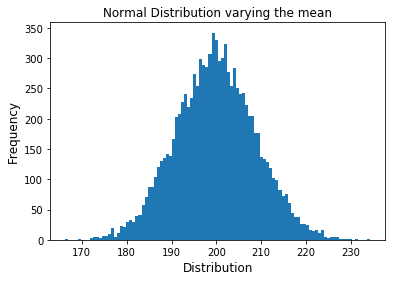

In [337]:
# size = number of data points
# loc = mean
# scale = standard deviation
normal_dist = stats.norm.rvs(size=10000, loc=200, scale=9, 
                             random_state=0) 
pd.Series(normal_dist).plot(kind="hist", bins=100)
plt.xlabel('Distribution', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Normal Distribution varying the mean")

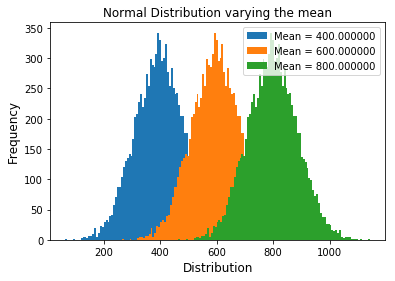

In [336]:
for mean in range(400, 900, 200):
    normal_dist = stats.norm.rvs(size=10000, loc=mean, scale=90, 
                             random_state=0) 
    pd.Series(normal_dist).plot(kind="hist", bins=100, 
                                label="Mean = {:f}".format(mean))
    plt.xlabel('Distribution', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title("Normal Distribution varying the mean")
    plt.legend()

### Cumulative Distribution Function

Cumulative Distribution Function (CDF) = gives us the probability of a certain random observation will have a lower value than the one provided by the user.

In [8]:
stats.norm.cdf(x=186,         # Cutoff value (quantile) to check
               loc=174,       # Mean
               scale=8.2)     # Standard Deviation

0.9283230216395894

### Percent point function

Percent point function (PPF) = gives us the quantile using a probability as input (inverse of cumulative distribution function).

In [9]:
stats.norm.ppf(q=0.83,      # Cutoff value (quantile) to check
               loc=174,     # Mean
               scale=8.2)   # Standard Deviation

181.82415507579879

### Probability density function

Probability density function (PDF) = gives us the likelihood of a random variable assuming a certain value.

In [10]:
stats.norm.pdf(x=154,         # Value to check
               loc=174,       # Distribution start
               scale=8.2)     # Distribution end

0.0024849750106086636

Text(0.5, 1.0, 'Normal Distribution')

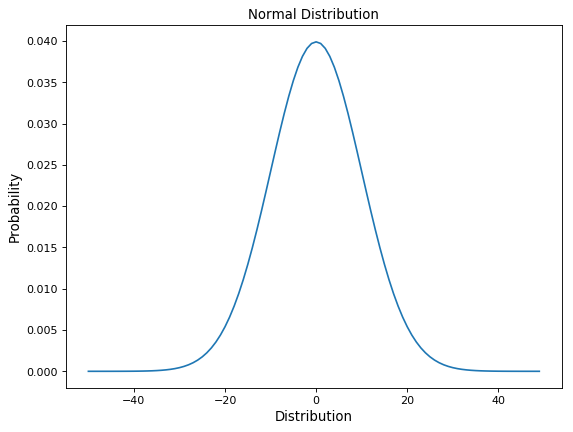

In [7]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
n = np.arange(-50, 50)
mean = 0
normal = stats.norm.pdf(n, mean, 10)
plt.plot(n, normal)
plt.xlabel('Distribution', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title("Normal Distribution")

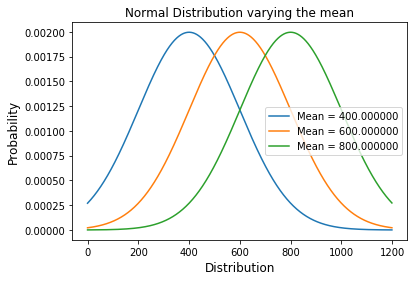

In [329]:
for mean in range(400, 900, 200):
    n = np.arange(0, 1200)
    normal = stats.norm.pdf(n, mean, 200)
    plt.plot(n, normal, label="Mean = {:f}".format(mean))
    plt.xlabel('Distribution', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title("Normal Distribution varying the mean")
    plt.legend()

## Poisson Distribution

Poisson Distributions are commonly used to find the probability that an event might happen or not knowing how often it usually occurs. Additionally, Poisson Distributions can also be used to predict how many times an event might occur in a given time period.
Poisson Distributions are for example frequently used by insurance companies to conduct risk analysis (eg. predict number of car crash accidents within a predefined time span) to decide car insurance pricing.
When working with Poisson Distributions, we can be confident of the average time between the occurrence of different events, but the precise moment an event might take place is randomly spaced in time.

In [63]:
poisson = stats.poisson.rvs(mu=3, size=10000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

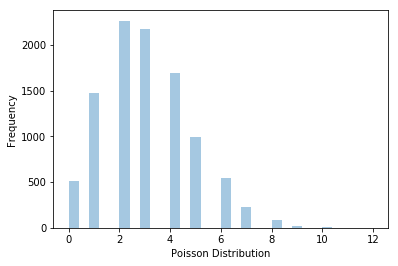

In [64]:
ax = sns.distplot(poisson,
                  bins=30,
                  kde=False)
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

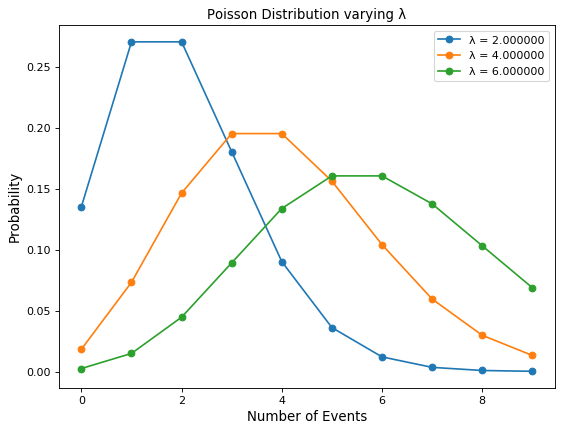

In [8]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# n = number of events, lambd = expected number of events 
# which can take place in a period
for lambd in range(2, 8, 2):
    n = np.arange(0, 10)
    poisson = stats.poisson.pmf(n, lambd)
    plt.plot(n, poisson, '-o', label="λ = {:f}".format(lambd))
    plt.xlabel('Number of Events', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title("Poisson Distribution varying λ")
    plt.legend()

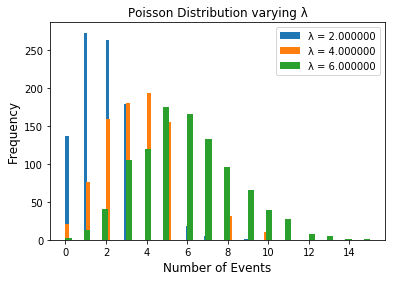

In [322]:
for lambd in range(2, 8, 2):
    poisson_data = stats.poisson.rvs(lambd, size=1000, random_state=0)
    pd.Series(poisson_data).plot(kind="hist", bins = 50, 
                                  label="λ = {:f}".format(lambd))
    plt.xlabel('Number of Events', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title("Poisson Distribution varying λ")
    plt.legend()

## Exponential Distribution

Finally, the Exponential Distribution is used to model the time taken between the occurrence of different events. 
As an example, let's imagine we work at a restaurant and we want to predict what is going to be the time interval between different customers coming in the restaurant. Using an Exponential Distribution for this type of problem, could be the perfect place where to start.

In [65]:
expon = stats.expon.rvs(scale=1,loc=0,size=1000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

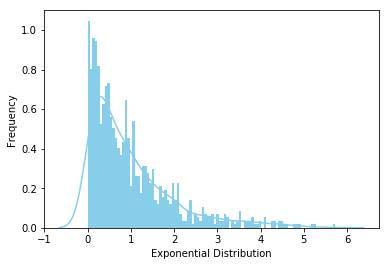

In [66]:
ax = sns.distplot(expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

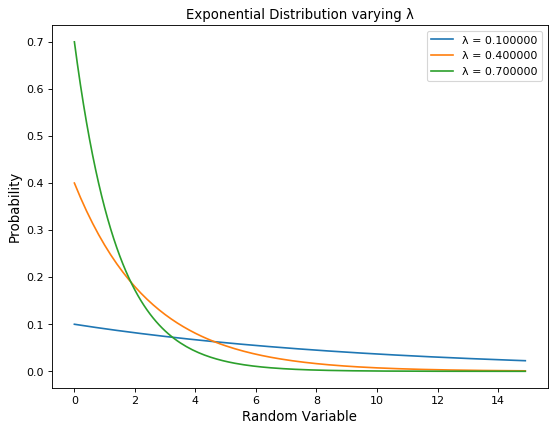

In [9]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for lambd in range(1,10, 3):
    x = np.arange(0, 15, 0.1)
    y = 0.1*lambd*np.exp(-0.1*lambd*x)
    plt.plot(x,y, label="λ = {:f}".format(0.1*lambd))
    plt.xlabel('Random Variable', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title("Exponential Distribution varying λ")
    plt.legend()